#**Titanic Dataset**

##**Varun Sahith K, 21BCT0195**

**Objectives** : Checking Null Values, Data Visualization, Outliers, Splitting into Dependent and Independent, Encoding, Splitting into Train and Test

**Link :** https://www.kaggle.com/datasets/yasserh/titanic-dataset



### Importing Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [151]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [152]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [153]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [154]:
df.shape

(891, 12)

In [155]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Null Values

In [158]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [159]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Here we can see more than 75% of Cabin is null , so we can remove that column or we can replace with a 0 (false) or 1(true).

In [160]:
df.drop("Cabin",axis=1,inplace=True)

* We can see Age column it have null values 117 , so lets replace it with median.

In [161]:
median_age = df["Age"].median()
median_age

28.0

In [162]:
df["Age"] = df["Age"].fillna(median_age)

* Now Embarked , As there are only 2 - we can drop or replace with mode , So lets replace

In [163]:
mode_em = df["Embarked"].mode()
mode_em

0    S
Name: Embarked, dtype: object

In [164]:
df["Embarked"] = df["Embarked"].fillna(mode_em[0])

In [165]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* No Null Values Observed.

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* Primarily, Here only Age and Fare comes under numerical , and all the others are just numerical but comes under categorical in this dataset

In [167]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [168]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Data Visualization

<Axes: >

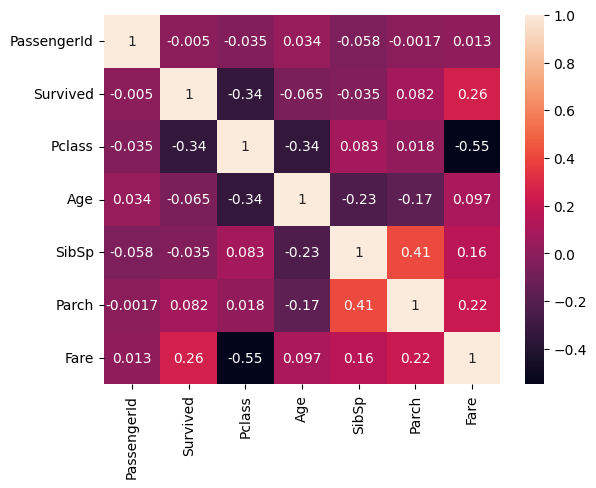

In [169]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

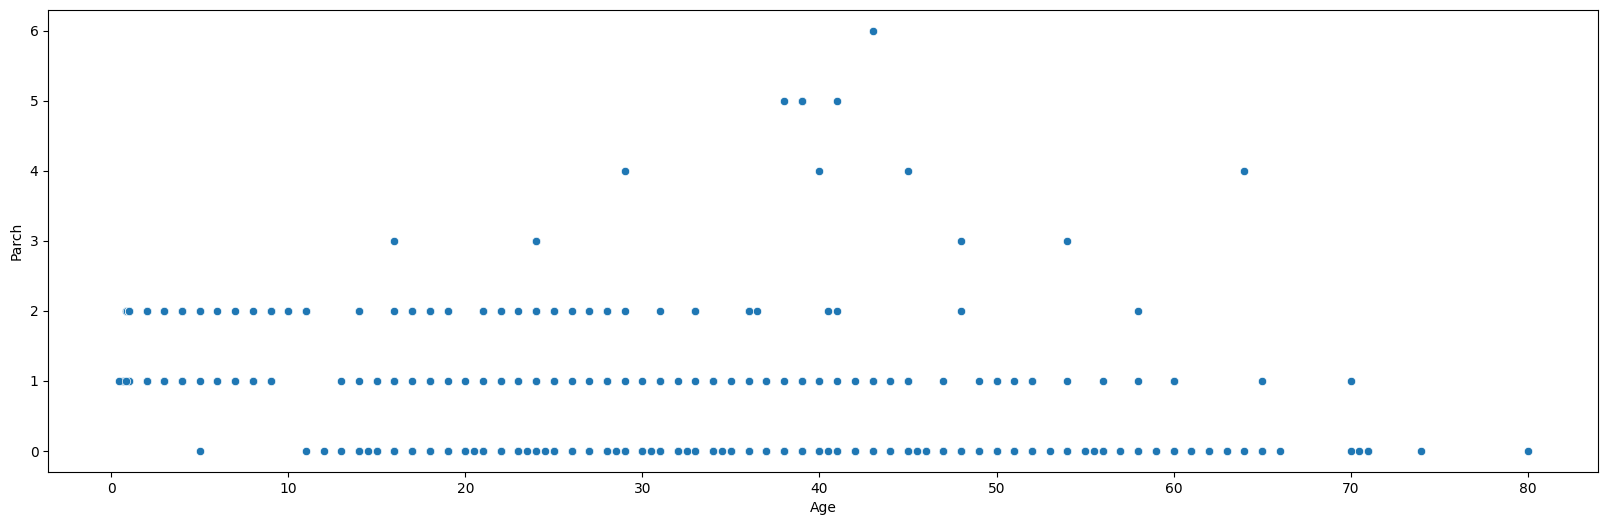

In [170]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="Age",y="Parch",data=df)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

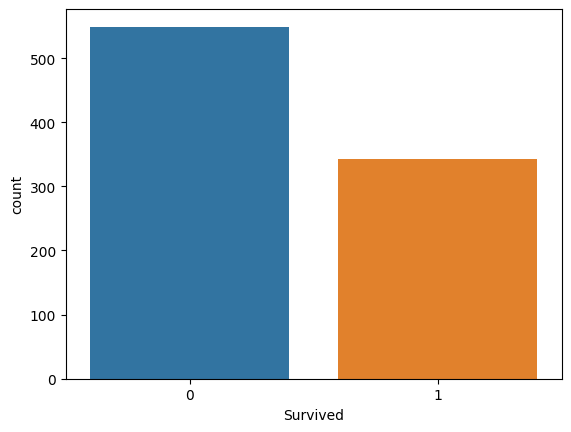

In [171]:
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Age', ylabel='count'>

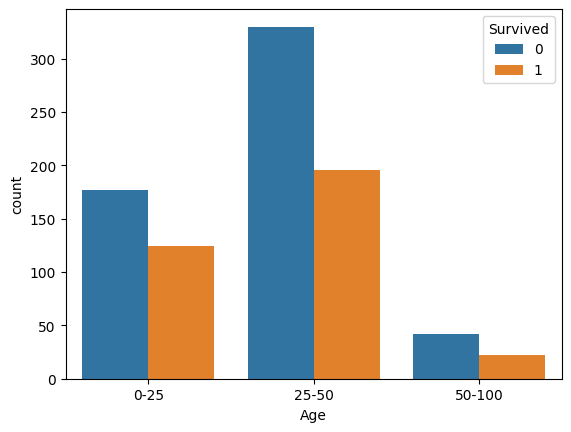

In [172]:
AgeGroup = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '50-100'])

sns.countplot(x=AgeGroup, hue=df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

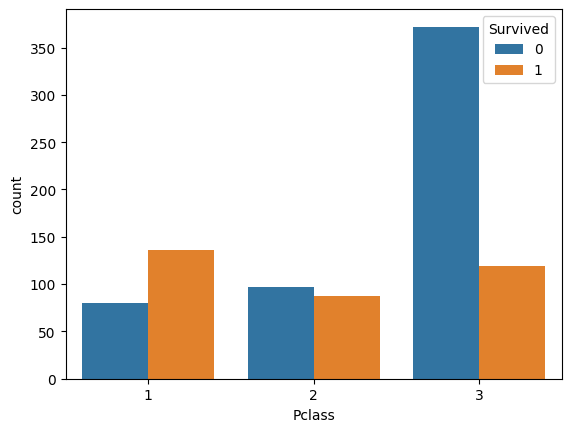

In [173]:
sns.countplot(x="Pclass",hue="Survived",data=df)

<Axes: xlabel='SibSp', ylabel='count'>

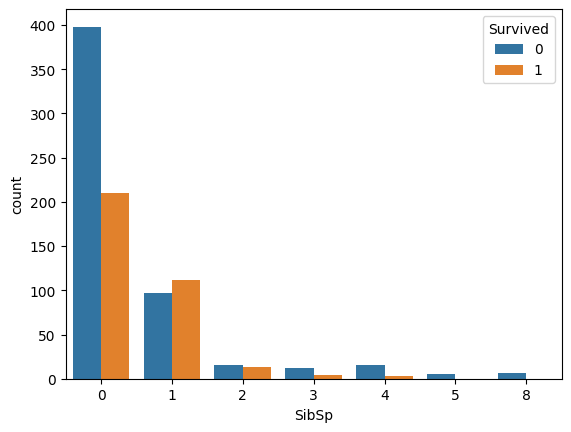

In [174]:
sns.countplot(data=df,x="SibSp",hue="Survived")

### Outliers

<Axes: xlabel='Sex', ylabel='Age'>

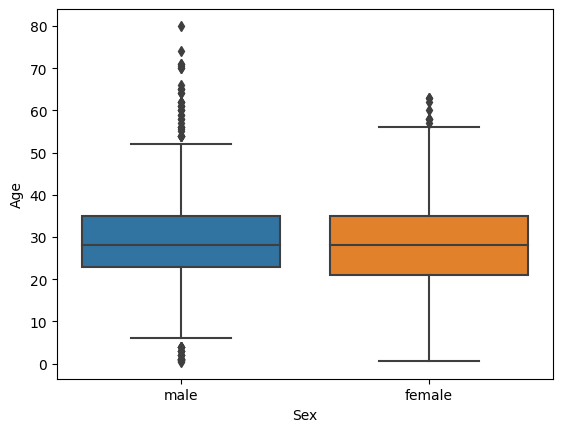

In [175]:
sns.boxplot(x="Sex",y="Age",data=df)

<Axes: xlabel='SibSp', ylabel='Age'>

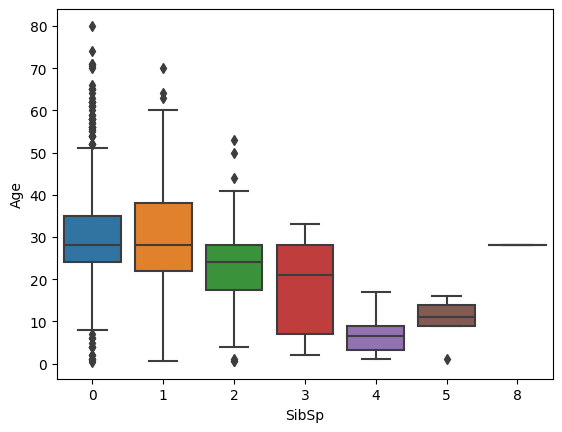

In [176]:
sns.boxplot(x='SibSp',y="Age", data=df)

<Axes: xlabel='Age'>

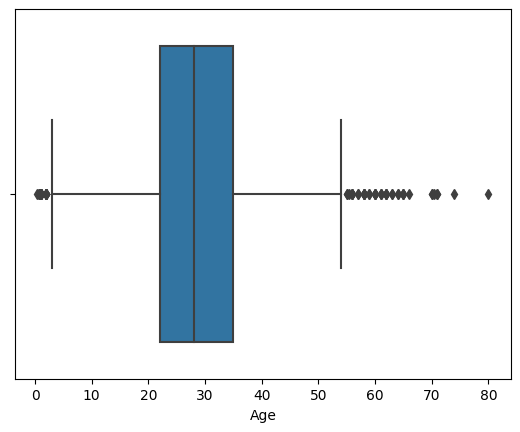

In [177]:
sns.boxplot(x="Age",data=df)

* There are outliers in the graph. So other than removing, we can replace it with median or remove it, Check for outliers.

In [178]:
Q1 = df.Age.quantile(0.25)
Q1

22.0

In [179]:
Q3 = df.Age.quantile(0.75)
Q3

35.0

In [180]:
IQR = Q3 - Q1
IQR

13.0

In [181]:
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5 * IQR

print("Upper Limit:",UL)
print("Lower Limit:",LL)

Upper Limit: 54.5
Lower Limit: 2.5


* Number of Outliers:

In [182]:
forUL = df["Age"]>UL
forLL = df["Age"]<LL

totalOutliers = forUL + forLL

print("Total Outliers : ",totalOutliers.sum())

Total Outliers :  66


In [183]:
df.shape

(891, 11)

* As there are 66 , aside from removing lets replace with median

In [184]:
df["Age"] = np.where((df["Age"] > UL) | (df["Age"] < LL), median_age, df["Age"])

<Axes: xlabel='Age'>

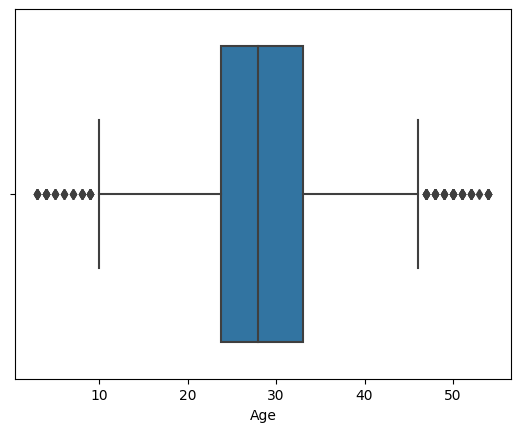

In [185]:
sns.boxplot(x="Age",data=df)

In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,28.476992,9.793559,3.0,23.7500,28.0000,33.0,54.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### Drop Unecessary Columns

* This step is not mandatory, Only to reduce the dataset.

In [187]:
df.drop(columns=["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [188]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Splitting Dependent and Independent variables

* Here we can clearly see that the Survived is the Dependent and Remaining are independent variables

* Independent Variable - 2D Array or Data Frame

* Dependent Variable - Series or 1D Array

In [189]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [190]:
dependent = df["Survived"]
independent = df.drop("Survived",axis=1)

In [191]:
dependent.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [192]:
independent.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [193]:
type(dependent)

pandas.core.series.Series

In [194]:
type(independent)

pandas.core.frame.DataFrame

### Perform Encoding

In [195]:
independent.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


* We have to encode Sex,Embarked as they are in categorical

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
le = LabelEncoder()

In [198]:
independent["Sex"] = le.fit_transform(independent["Sex"])

In [199]:
independent.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [200]:
independent.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,1,27.0,0,0,13.00,S
887,1,0,19.0,0,0,30.00,S
888,3,0,28.0,1,2,23.45,S
889,1,1,26.0,0,0,30.00,C
890,3,1,32.0,0,0,7.75,Q


In [201]:
embarked = pd.get_dummies(independent["Embarked"],drop_first=True)

In [202]:
independent = pd.concat([independent,embarked],axis=1)
independent.drop("Embarked",axis=1,inplace=True)

In [203]:
independent.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [204]:
independent.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
886,2,1,27.0,0,0,13.00,0,1
887,1,0,19.0,0,0,30.00,0,1
888,3,0,28.0,1,2,23.45,0,1
889,1,1,26.0,0,0,30.00,0,0
890,3,1,32.0,0,0,7.75,1,0


### Splitting Data into Train and Test

In [205]:
from sklearn.model_selection import train_test_split as tts

In [206]:
independent_train,independent_test,dependent_train,dependent_test = tts(independent,dependent,test_size=0.2,random_state=0)

In [207]:
independent_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
140,3,0,28.0,0,2,15.2458,0,0
439,2,1,31.0,0,0,10.5000,0,1
817,2,1,31.0,1,1,37.0042,0,0
378,3,1,20.0,0,0,4.0125,0,0
491,3,1,21.0,0,0,7.2500,0,1


In [208]:
independent_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
495,3,1,28.0,0,0,14.4583,0,0
648,3,1,28.0,0,0,7.5500,0,1
278,3,1,7.0,4,1,29.1250,1,0
31,1,0,28.0,1,0,146.5208,0,0
255,3,0,29.0,0,2,15.2458,0,0


In [209]:
dependent_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [210]:
dependent_test.head()

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64

In [211]:
independent_train.shape,independent_test.shape,dependent_train.shape,dependent_test.shape

((712, 8), (179, 8), (712,), (179,))

### Feature Scaling

* Only for independent we will perform Feature Scaling.

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
sc = StandardScaler()

In [214]:
independent_test_fs = sc.fit_transform(independent_test)
independent_test_fs

array([[ 0.86022947,  0.77344314, -0.05003246, ..., -0.39903373,
        -0.27984505, -1.56278843],
       [ 0.86022947,  0.77344314, -0.05003246, ..., -0.54333564,
        -0.27984505,  0.63988188],
       [ 0.86022947,  0.77344314, -2.12817628, ..., -0.09267286,
         3.57340605, -1.56278843],
       ...,
       [-1.50871015, -1.29291987,  0.24684523, ...,  1.66506862,
        -0.27984505, -1.56278843],
       [ 0.86022947,  0.77344314, -0.54482861, ..., -0.53698145,
        -0.27984505,  0.63988188],
       [ 0.86022947,  0.77344314, -0.94066553, ..., -0.53289154,
        -0.27984505,  0.63988188]])